<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12-balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-3-r12.csv?token=AKVFSOG3IAQJU2HK67G4XUS6ZQFBU')
print(df.shape)
df

(8715, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1209,0,3,1,1,4,3,9,3,3,28,12,25,6,6,1.0,28,1,1,1,1,1,0,1,4,100,3,27,9,1
1,1217,2,0,2,1,4,3,9,28,12,27,11,25,4,0,0.0,4,1,1,1,1,1,0,2,8,200,6,27,18,1
2,1248,0,3,1,1,4,3,9,0,0,28,12,26,3,3,1.0,16,1,1,1,1,1,0,1,4,104,3,27,9,1
3,1256,2,0,2,1,4,3,10,28,12,27,11,26,4,0,0.0,4,1,1,1,1,1,0,2,8,208,6,30,18,1
4,1289,0,3,3,1,4,3,9,27,11,28,12,25,4,4,1.0,23,1,1,1,1,1,0,3,12,300,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,3267484,2,0,6,4,2,3,10,28,12,27,11,20028,4,0,0.0,25,1,1,1,1,1,0,24,48,961344,18,30,54,1
8711,3267491,2,0,6,5,3,3,10,28,12,27,11,20028,4,0,0.0,32,1,1,1,1,1,0,30,90,1802520,18,30,54,1
8712,3267492,2,0,2,1,4,3,11,28,12,27,11,20029,4,0,0.0,32,1,1,1,1,1,0,2,8,160232,6,33,18,1
8713,3267493,2,0,7,1,4,3,12,28,12,3,3,20028,6,0,0.0,5,1,1,1,1,1,0,7,28,560784,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-1-r12.csv?token=AKVFSOB6RDTURM5OVCVVJK26ZQFB2',nrows=51000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-6-r12.csv?token=AKVFSOCMDBJSQN452XGTK4S6ZQFCE',nrows=51000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-9-r12.csv?token=AKVFSOFXGPNFQAPHT5BNR7C6ZQFCK',nrows=51000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-14-r12.csv?token=AKVFSOG4A6DWDJJZ4ZNCYBC6ZQFC2',nrows=51000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-5-r12.csv?token=AKVFSOEDZHZZCWYZ2Q7GHSC6ZQFI2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-12-r12.csv?token=AKVFSOGDLV3OI5A7PXLB3J26ZQFJA',nrows=12000)
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-15-r12.csv?token=AKVFSOCUMEDQZIC6XCBX3PS6ZQFJC')

In [39]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(12725, 30)
(12725, 30)
(12683, 30)
(17945, 30)
(8757, 30)
(12000, 30)
(13953, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [41]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,12,12,23,7,2,5,0,0.00,4,1,1,1,1,1,0,1,4,8,3,27,9,1
1,96,3,2,1,1,4,3,9,15,15,24,8,3,4,3,0.75,16,1,1,1,1,1,6,1,4,12,3,27,9,1
2,104,0,3,4,1,1,5,17,23,7,12,12,2,5,5,1.00,24,11,1,11,11,121,0,4,4,8,20,85,100,1
3,105,0,3,4,2,2,5,17,23,7,12,12,2,5,5,1.00,25,10,2,11,20,220,0,8,16,32,20,85,100,1
4,106,0,3,4,3,2,5,17,23,7,12,12,2,5,5,1.00,26,9,3,11,27,297,0,12,24,48,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99498,3273988,2,0,6,4,2,3,10,28,12,27,11,20043,4,0,0.00,25,1,1,1,1,1,0,24,48,962064,18,30,54,1
99499,3273995,2,0,6,5,3,3,10,28,12,27,11,20043,4,0,0.00,32,1,1,1,1,1,0,30,90,1803870,18,30,54,1
99500,3273996,2,0,2,1,4,3,11,28,12,27,11,20044,4,0,0.00,32,1,1,1,1,1,0,2,8,160352,6,33,18,1
99501,3273997,2,0,7,1,4,3,12,28,12,15,15,20043,3,0,0.00,5,1,1,1,1,1,0,7,28,561204,21,36,63,1


In [42]:
df.shape

(99503, 30)

Test Data

In [43]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-2-r12.csv?token=AKVFSOBSSTYO2A5NFYDKR5C6ZQFN2',nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-5-r12.csv?token=AKVFSODWJDT7WPUOUPPO7RK6ZQFN6',nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-10-r12.csv?token=AKVFSOBQC4O3AM7NQJLQS326ZQFOE',nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-12-r12.csv?token=AKVFSOCSFXD7337OS2D4OOC6ZQFOK',nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-13-r12.csv?token=AKVFSOHPPNOME53W62FUGMS6ZQFOO',nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-malicious-n-0-3-m-15-r12.csv?token=AKVFSOH5KNQAXP4BNRMGKOS6ZQFOS',nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r12/2-fft-normal-n-0-10-r12.csv?token=AKVFSOBUS5WTTRIBIRRT44C6ZQFUK',nrows=30000)
df5.shape

(12725, 30)

In [44]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1209,0,3,1,1,4,3,9,3,3,28,12,37,6,6,1.0,28,1,1,1,1,1,0,1,4,148,3,27,9,0
1,1217,2,0,2,1,4,3,9,28,12,27,11,37,4,0,0.0,4,1,1,1,1,1,0,2,8,296,6,27,18,0
2,1231,0,3,1,1,4,3,9,2,2,28,12,38,5,5,1.0,24,1,1,1,1,1,0,1,4,152,3,27,9,0
3,1239,2,0,2,1,4,3,10,28,12,27,11,38,4,0,0.0,4,1,1,1,1,1,0,2,8,304,6,30,18,0
4,1272,0,3,1,1,4,3,9,0,0,28,12,39,3,3,1.0,16,1,1,1,1,1,0,1,4,156,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,3269005,2,0,6,4,2,3,10,28,12,27,11,30051,4,0,0.0,25,1,1,1,1,1,0,24,48,1442448,18,30,54,0
12721,3269012,2,0,6,5,3,3,10,28,12,27,11,30051,4,0,0.0,32,1,1,1,1,1,0,30,90,2704590,18,30,54,0
12722,3269013,2,0,2,1,4,3,11,28,12,27,11,30052,4,0,0.0,32,1,1,1,1,1,0,2,8,240416,6,33,18,0
12723,3269014,2,0,7,1,4,3,12,28,12,3,3,30051,6,0,0.0,6,1,1,1,1,1,0,7,28,841428,21,36,63,0


In [45]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [47]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.673228,0.346504,-0.079456,0.111602,-0.263669,-0.077771,0.007440,0.204058,-0.625372,-0.770912,-0.371013,-0.115036,-0.022392,-0.082654,-0.059828,-0.037130,0.611102,0.043823,0.085270,0.066529,0.246788,-0.190840,0.072862,0.019225
inport,-0.673228,1.000000,-0.314368,-0.012062,0.016943,0.250743,-0.103589,-0.021552,0.011541,0.882983,0.972870,0.435896,0.059841,-0.055891,0.002376,-0.007991,-0.013907,0.143517,-0.152426,-0.134417,-0.113779,-0.219856,0.102260,-0.057619,0.010510
cache_coherence_type,0.346504,-0.314368,1.000000,0.249725,-0.350756,-0.119187,-0.092255,0.079191,0.095052,-0.295939,-0.355729,-0.494635,-0.048578,-0.091160,-0.084043,-0.052859,-0.030323,0.121792,0.457045,0.413488,0.329715,0.937371,-0.111745,0.682619,-0.045409
flit_id,-0.079456,-0.012062,0.249725,1.000000,-0.192505,0.098693,0.071367,-0.010268,-0.065256,-0.007028,0.021188,0.471331,0.004056,0.088120,0.055438,0.063077,0.042074,-0.099804,0.965112,0.902119,0.623491,0.279152,0.090288,0.265014,0.022849
flit_type,0.111602,0.016943,-0.350756,-0.192505,1.000000,-0.138621,-0.100240,0.014423,0.091656,0.009872,-0.029760,0.238299,-0.116353,-0.011256,-0.076749,-0.076058,-0.051809,0.140182,-0.244377,0.053557,0.038122,-0.392088,-0.126816,-0.372230,-0.032093
vnet,-0.263669,0.250743,-0.119187,0.098693,-0.138621,1.000000,0.851935,-0.319118,-0.226390,0.106893,0.254444,-0.109659,0.494279,0.324326,0.492338,0.373935,0.229527,-0.106105,-0.003604,-0.023522,-0.179839,0.234127,0.972318,0.644205,0.269411
vc,-0.077771,-0.103589,-0.092255,0.071367,-0.100240,0.851935,1.000000,-0.282433,-0.227869,-0.191485,-0.082649,-0.200413,0.447274,0.330903,0.468023,0.361482,0.227806,-0.234346,0.011302,-0.011071,-0.150718,0.208553,0.950707,0.555973,0.238368
traversal_id,0.007440,-0.021552,0.079191,-0.010268,0.014423,-0.319118,-0.282433,1.000000,0.108486,0.027220,-0.021552,0.096327,-0.331600,-0.331576,-0.398858,-0.306950,-0.210444,-0.006973,0.036483,0.032891,0.559781,-0.034415,-0.314999,-0.173873,-0.477688
hop_count,0.204058,0.011541,0.095052,-0.065256,0.091656,-0.226390,-0.227869,0.108486,1.000000,0.361463,-0.069068,0.208178,-0.180732,-0.165829,-0.208434,-0.161992,-0.107647,0.280101,-0.025606,0.004336,0.057447,0.013648,-0.235741,-0.093405,-0.111947
current_hop,-0.625372,0.882983,-0.295939,-0.007028,0.009872,0.106893,-0.191485,0.027220,0.361463,1.000000,0.875488,0.547715,-0.004624,-0.093802,-0.059197,-0.052599,-0.040438,0.082652,-0.128222,-0.118805,-0.076775,-0.252278,-0.022145,-0.149300,-0.034418


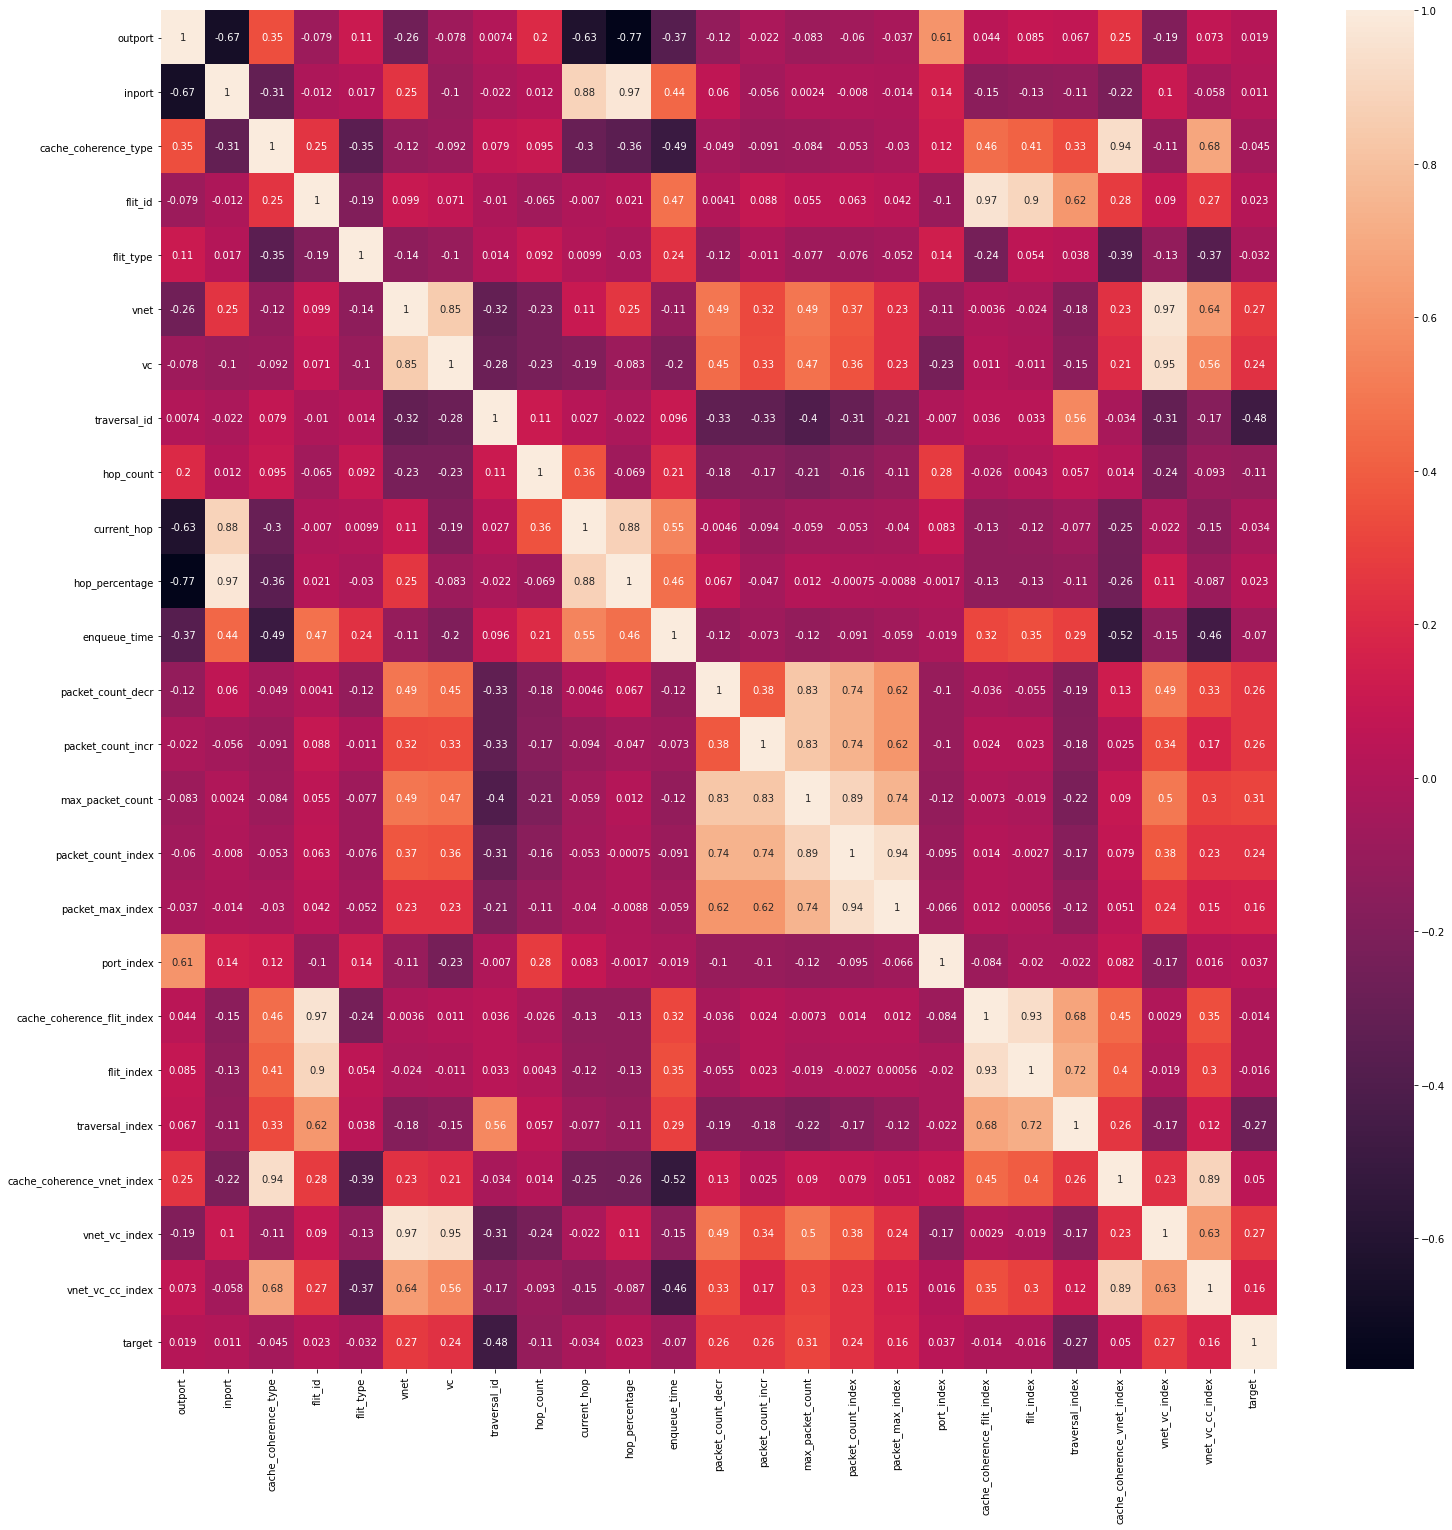

In [48]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [49]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,2,5,0,0.00,4,1,1,1,1,1,0,1,4,8,3,27,9
1,3,2,1,1,4,3,9,3,4,3,0.75,16,1,1,1,1,1,6,1,4,12,3,27,9
2,0,3,4,1,1,5,17,2,5,5,1.00,24,11,1,11,11,121,0,4,4,8,20,85,100
3,0,3,4,2,2,5,17,2,5,5,1.00,25,10,2,11,20,220,0,8,16,32,20,85,100
4,0,3,4,3,2,5,17,2,5,5,1.00,26,9,3,11,27,297,0,12,24,48,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99498,2,0,6,4,2,3,10,20043,4,0,0.00,25,1,1,1,1,1,0,24,48,962064,18,30,54
99499,2,0,6,5,3,3,10,20043,4,0,0.00,32,1,1,1,1,1,0,30,90,1803870,18,30,54
99500,2,0,2,1,4,3,11,20044,4,0,0.00,32,1,1,1,1,1,0,2,8,160352,6,33,18
99501,2,0,7,1,4,3,12,20043,3,0,0.00,5,1,1,1,1,1,0,7,28,561204,21,36,63


In [50]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.666667,0.000000,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.666667,0.500000,0.75,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.303030,0.416667,0.000000,0.416667,0.059524,0.028409,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.000000,1.000000,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.318182,0.375000,0.041667,0.416667,0.113095,0.051847,0.0,0.241379,0.139535,0.000009,0.944444,1.000000,1.000000
4,0.000000,1.000000,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.833333,0.833333,1.00,0.333333,0.333333,0.083333,0.416667,0.154762,0.070076,0.0,0.379310,0.232558,0.000015,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99498,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.125,0.666412,0.666667,0.000000,0.00,0.318182,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.793103,0.511628,0.355441,0.833333,0.051724,0.494505
99499,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.125,0.666412,0.666667,0.000000,0.00,0.424242,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.666455,0.833333,0.051724,0.494505
99500,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.250,0.666445,0.666667,0.000000,0.00,0.424242,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.034483,0.046512,0.059241,0.166667,0.103448,0.098901
99501,0.666667,0.000000,1.000000,0.00,1.000000,0.0,0.375,0.666412,0.500000,0.000000,0.00,0.015152,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.206897,0.279070,0.207340,1.000000,0.155172,0.593407


In [51]:
train_X[train_X.duplicated()].shape

(1945, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [53]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.0,0.452830,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.666667,0.833333,1.0,0.377358,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.000000,0.500000,1.0,0.226415,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12721,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12722,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12723,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [54]:
test_X[test_X.duplicated()].shape

(0, 24)

In [55]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.500000,1.0,0.206897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,1.000000,1.000000,1.0,0.413793,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000067,0.000000,0.500000,1.0,0.206897,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.362069,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12679,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12680,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.482759,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12681,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [56]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.500000,1.0,0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000055,0.166667,0.000000,0.166667
2,0.000000,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,1.000000,1.000000,1.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000058,0.166667,0.333333,0.166667
4,0.000000,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.666667,1.0,0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000109,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12678,0.666667,0.0,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533308,0.833333,0.333333,0.833333
12679,0.666667,0.0,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
12680,0.666667,0.0,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088842,0.166667,0.666667,0.166667
12681,0.666667,0.0,1.000000,0.00,1.000000,0.0,1.000000,0.999967,1.000000,0.000000,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311073,1.000000,1.000000,1.000000


In [57]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.666667,0.0,0.0,0.00,1.000000,0.0,0.0,0.0,0.833333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,1.0,0.5,0.00,0.000000,1.0,1.0,0.0,0.833333,0.833333,1.0,0.357143,0.357143,0.000000,0.357143,0.044643,0.018394,0.0,0.103448,0.000000,0.000000,0.944444,1.0,1.0
2,0.000000,1.0,0.5,0.25,0.333333,1.0,1.0,0.0,0.833333,0.833333,1.0,0.375000,0.321429,0.035714,0.357143,0.084821,0.033568,0.0,0.241379,0.139535,0.000032,0.944444,1.0,1.0
3,0.000000,1.0,0.5,0.50,0.333333,1.0,1.0,0.0,0.833333,0.833333,1.0,0.392857,0.285714,0.071429,0.357143,0.116071,0.045371,0.0,0.379310,0.232558,0.000053,0.944444,1.0,1.0
4,0.000000,1.0,0.5,0.75,0.333333,1.0,1.0,0.0,0.833333,0.833333,1.0,0.410714,0.250000,0.107143,0.357143,0.138393,0.053801,0.0,0.517241,0.325581,0.000074,0.944444,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,1.0,0.5,0.00,0.000000,1.0,1.0,1.0,0.833333,0.833333,1.0,0.375000,0.142857,0.000000,0.142857,0.017857,0.003679,0.0,0.103448,0.000000,0.044452,0.944444,1.0,1.0
29996,0.000000,1.0,0.5,0.25,0.333333,1.0,1.0,1.0,0.833333,0.833333,1.0,0.392857,0.107143,0.035714,0.142857,0.031250,0.005978,0.0,0.241379,0.139535,0.177839,0.944444,1.0,1.0
29997,0.000000,1.0,0.5,0.50,0.333333,1.0,1.0,1.0,0.833333,0.833333,1.0,0.410714,0.071429,0.071429,0.142857,0.035714,0.006744,0.0,0.379310,0.232558,0.266764,0.944444,1.0,1.0
29998,0.000000,1.0,0.5,0.75,0.333333,1.0,1.0,1.0,0.833333,0.833333,1.0,0.428571,0.035714,0.107143,0.142857,0.031250,0.005978,0.0,0.517241,0.325581,0.355689,0.944444,1.0,1.0


In [58]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(46, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.2,0.166667,0.500000,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.000998,0.4,0.166667,0.333333,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.001065,1.0,1.000000,1.000000,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000047,0.000000,0.000000,0.000000
3,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.000000,0.001065,0.6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000102,0.166667,0.000000,0.166667
4,0.000000,0.666667,0.000000,0.0,1.0,0.0,0.000000,0.001098,0.0,0.166667,1.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17982,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.666667,0.999534,0.6,0.000000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088888,0.166667,0.666667,0.166667
17983,1.000000,0.000000,1.000000,0.0,1.0,0.0,1.000000,0.999468,0.4,0.000000,0.000000,0.035714,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311106,1.000000,1.000000,1.000000
17984,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.999534,0.6,0.666667,1.000000,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133336,0.333333,0.000000,0.333333
17985,1.000000,0.666667,1.000000,0.0,1.0,0.0,0.000000,0.999867,0.6,0.166667,0.250000,0.107143,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311230,1.000000,0.000000,1.000000


In [59]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(31, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.500000,0.75,0.226415,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000998,0.666667,0.500000,0.60,0.226415,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000044,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.001065,1.000000,1.000000,1.00,0.452830,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000047,0.000000,0.000000,0.000000
3,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.000000,0.001065,0.333333,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000102,0.166667,0.000000,0.166667
4,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.001098,0.000000,0.500000,1.00,0.226415,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000049,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17946,0.666667,0.000000,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.333333,0.000000,0.00,0.396226,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533330,0.833333,0.333333,0.833333
17947,0.666667,0.000000,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.333333,0.000000,0.00,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
17948,0.666667,0.000000,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.333333,0.000000,0.00,0.528302,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088885,0.166667,0.666667,0.166667
17949,0.666667,0.000000,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.000000,0.000000,0.00,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311106,1.000000,1.000000,1.000000


In [60]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.75,1.00,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000053,0.166667,0.000000,0.166667
2,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.000000,0.333333,1.00,1.00,0.431818,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000106,0.333333,0.000000,0.333333
3,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.000100,0.000000,0.75,1.00,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
4,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.333333,0.000100,0.333333,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000062,0.166667,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8752,0.666667,0.000000,0.166667,0.0,1.0,0.0,0.666667,0.999650,0.333333,0.00,0.00,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088845,0.166667,0.666667,0.166667
8753,1.000000,0.000000,1.000000,0.0,1.0,0.0,1.000000,0.999601,0.000000,0.00,0.00,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311074,1.000000,1.000000,1.000000
8754,0.000000,1.000000,0.333333,0.0,1.0,0.0,0.000000,0.999650,0.333333,1.00,1.00,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133294,0.333333,0.000000,0.333333
8755,1.000000,0.666667,1.000000,0.0,1.0,0.0,0.000000,0.999900,0.333333,0.25,0.25,0.113636,0.0,0.0,0.0,0.0,0.0,1.0,0.206897,0.279070,0.311168,1.000000,0.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [62]:
train_Y = df['target']
train_Y.value_counts()

0    56078
1    43425
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  5509.080885
7                 traversal_id  3362.717658
22               vnet_vc_index  3157.380990
14            max_packet_count  2512.023636
6                           vc  1880.007106
12           packet_count_decr  1259.183495
13           packet_count_incr  1252.846269
20             traversal_index  1150.096489
15          packet_count_index   787.134346
16            packet_max_index   332.651872
23            vnet_vc_cc_index   232.732739
17                  port_index    90.884133
8                    hop_count    57.832425
11                enqueue_time    47.195900
10              hop_percentage    24.494513
9                  current_hop    24.136278
21  cache_coherence_vnet_index    22.510427


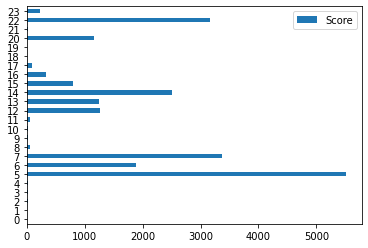

In [65]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [68]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 69.21308509836436
Test Prediction  69.34827395608261


In [70]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  58.019646365422396


In [71]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  59.11062051565087


In [72]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  58.85831427895608


In [73]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  37.3


In [74]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  54.86740423639295


In [75]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  49.13932371455629


In [76]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  39.03163183738723


In [77]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
14,max_packet_count,5.421058
10,hop_percentage,4.098069
5,vnet,3.951714
13,packet_count_incr,3.121538
12,packet_count_decr,2.299520
23,vnet_vc_cc_index,2.107259
22,vnet_vc_index,1.989856
0,outport,1.418149
3,flit_id,0.976118
11,enqueue_time,0.702319


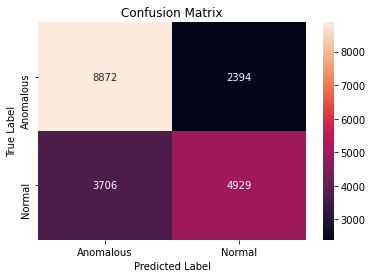

In [78]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.74     11266
           1       0.67      0.57      0.62      8635

    accuracy                           0.69     19901
   macro avg       0.69      0.68      0.68     19901
weighted avg       0.69      0.69      0.69     19901



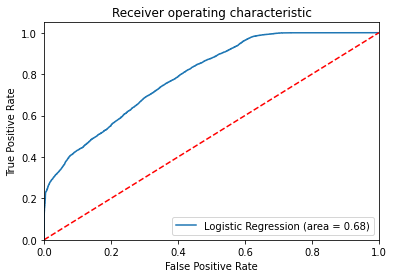

In [80]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

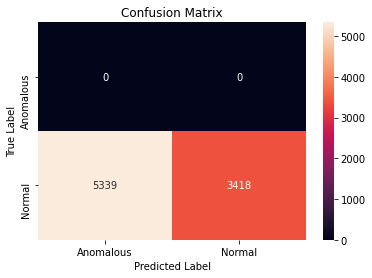

In [81]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.39      0.56      8757

    accuracy                           0.39      8757
   macro avg       0.50      0.20      0.28      8757
weighted avg       1.00      0.39      0.56      8757



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [83]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [85]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 86.57697042787869
Test Prediction  76.19717602130545


In [86]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  88.70726915520629


In [87]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.60545612236854


In [88]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  87.99180004730742


In [89]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  25.62333333333333


In [90]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  89.25334964140768


In [91]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.83432677845245


In [92]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  16.740892999885805


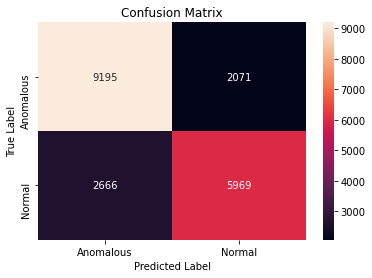

In [93]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     11266
           1       0.74      0.69      0.72      8635

    accuracy                           0.76     19901
   macro avg       0.76      0.75      0.76     19901
weighted avg       0.76      0.76      0.76     19901



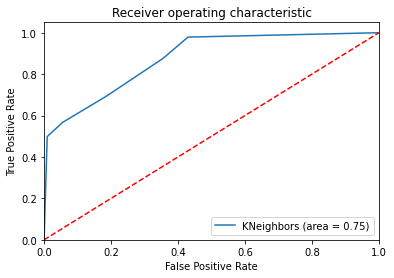

In [95]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

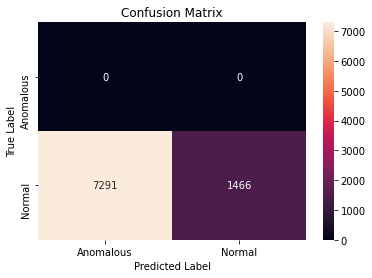

In [96]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [97]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.17      0.29      8757

    accuracy                           0.17      8757
   macro avg       0.50      0.08      0.14      8757
weighted avg       1.00      0.17      0.29      8757



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [99]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [101]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 66.1377854827768
Test Prediction Score 66.60971810461785


In [102]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 72.25933202357564


In [103]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  71.07151304896317


In [104]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  70.84286052195853


In [105]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  36.33


In [106]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  78.38438872519042


In [107]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  78.49701966464264


In [108]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  27.28103231700354


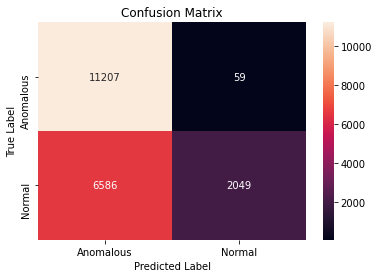

In [109]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77     11266
           1       0.97      0.24      0.38      8635

    accuracy                           0.67     19901
   macro avg       0.80      0.62      0.58     19901
weighted avg       0.78      0.67      0.60     19901



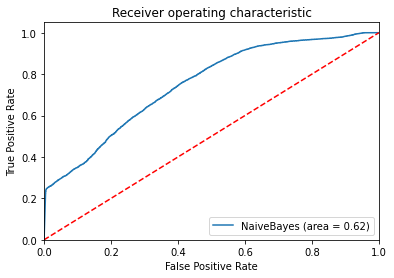

In [111]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [112]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [113]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 63681 samples, validate on 15921 samples
Epoch 1/10
63681/63681 [==============================] - 3s 42us/step - loss: 0.2139 - accuracy: 0.6611 - val_loss: 0.1970 - val_accuracy: 0.6789
Epoch 2/10
63681/63681 [==============================] - 2s 38us/step - loss: 0.1916 - accuracy: 0.6820 - val_loss: 0.1899 - val_accuracy: 0.6804
Epoch 3/10
63681/63681 [==============================] - 2s 37us/step - loss: 0.1872 - accuracy: 0.6831 - val_loss: 0.1873 - val_accuracy: 0.6822
Epoch 4/10
63681/63681 [==============================] - 2s 37us/step - loss: 0.1854 - accuracy: 0.6850 - val_loss: 0.1867 - val_accuracy: 0.6851
Epoch 5/10
63681/63681 [==============================] - 2s 37us/step - loss: 0.1844 - accuracy: 0.6856 - val_loss: 0.1852 - val_accuracy: 0.6836
Epoch 6/10
63681/63681 [==============================] - 2s 38us/step - loss: 0.1837 - accuracy: 0.6859 - val_loss: 0.1846 - val_accuracy: 0.6838
Epoch 7/10
63681/63681 [==============================] - 2s 37us/st

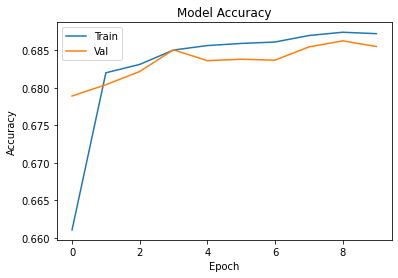

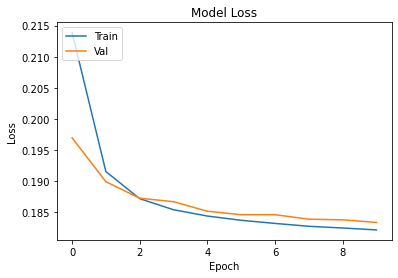

In [114]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [115]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.80%


In [116]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.44%


In [117]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.94%


In [118]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.76%


In [119]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 33.69%


In [120]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.84%


In [121]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.76%


In [122]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 26.50%


3-Layer Neural Network

In [123]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 63681 samples, validate on 15921 samples
Epoch 1/30
63681/63681 [==============================] - 2s 37us/step - loss: 0.2473 - accuracy: 0.5502 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 2/30
63681/63681 [==============================] - 2s 37us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 3/30
63681/63681 [==============================] - 2s 38us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 4/30
63681/63681 [==============================] - 2s 38us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 5/30
63681/63681 [==============================] - 2s 37us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 6/30
63681/63681 [==============================] - 2s 37us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 7/30
63681/63681 [==============================] - 3s 40us/st

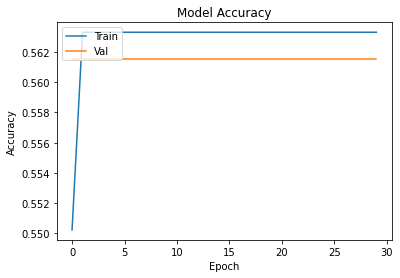

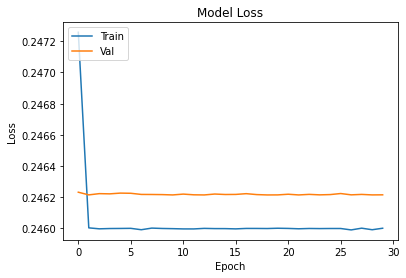

In [124]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [125]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.61%


In [126]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 0.00%


4-Layer Neural Network



In [127]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 63681 samples, validate on 15921 samples
Epoch 1/30
63681/63681 [==============================] - 3s 41us/step - loss: 0.2473 - accuracy: 0.5515 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 2/30
63681/63681 [==============================] - 2s 38us/step - loss: 0.2460 - accuracy: 0.5633 - val_loss: 0.2462 - val_accuracy: 0.5615
Epoch 3/30
63681/63681 [==============================] - 3s 41us/step - loss: 0.2457 - accuracy: 0.5633 - val_loss: 0.2454 - val_accuracy: 0.5615
Epoch 4/30
63681/63681 [==============================] - 3s 40us/step - loss: 0.2433 - accuracy: 0.5793 - val_loss: 0.2403 - val_accuracy: 0.6156
Epoch 5/30
63681/63681 [==============================] - 3s 40us/step - loss: 0.2334 - accuracy: 0.6234 - val_loss: 0.2251 - val_accuracy: 0.6343
Epoch 6/30
63681/63681 [==============================] - 2s 39us/step - loss: 0.2130 - accuracy: 0.6582 - val_loss: 0.2006 - val_accuracy: 0.6735
Epoch 7/30
63681/63681 [==============================] - 2s 39us/st

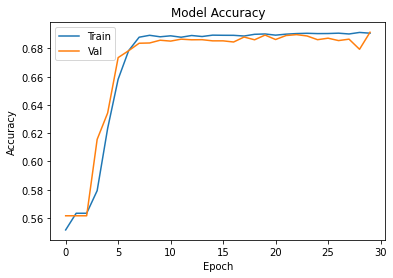

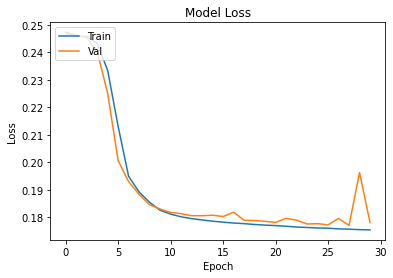

In [128]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [129]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.26%


In [130]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.08%
accuracy: 53.95%
accuracy: 53.81%
accuracy: 34.14%
accuracy: 48.86%
accuracy: 44.57%
accuracy: 44.63%


5-Layer Neural Network Optimized

In [131]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 63681 samples, validate on 15921 samples
Epoch 1/100
63681/63681 [==============================] - 6s 90us/step - loss: 0.1599 - accuracy: 0.7361 - val_loss: 0.1391 - val_accuracy: 0.7638
Epoch 2/100
63681/63681 [==============================] - 5s 86us/step - loss: 0.1416 - accuracy: 0.7642 - val_loss: 0.1355 - val_accuracy: 0.7727
Epoch 3/100
63681/63681 [==============================] - 5s 80us/step - loss: 0.1383 - accuracy: 0.7662 - val_loss: 0.1313 - val_accuracy: 0.7771
Epoch 4/100
63681/63681 [==============================] - 5s 86us/step - loss: 0.1361 - accuracy: 0.7703 - val_loss: 0.1323 - val_accuracy: 0.7737
Epoch 5/100
63681/63681 [==============================] - 5s 73us/step - loss: 0.1351 - accuracy: 0.7718 - val_loss: 0.1331 - val_accuracy: 0.7781
Epoch 6/100
63681/63681 [==============================] - 5s 75us/step - loss: 0.1351 - accuracy: 0.7703 - val_loss: 0.1320 - val_accuracy: 0.7718
Epoch 7/100
63681/63681 [==============================] - 5s 

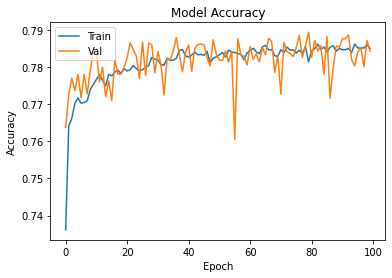

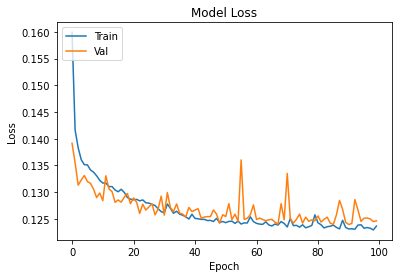

In [132]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [133]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.60%


In [134]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.80%
accuracy: 89.98%
accuracy: 89.94%
accuracy: 26.40%
accuracy: 91.84%
accuracy: 76.26%
accuracy: 16.76%


In [135]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 63681 samples, validate on 15921 samples
Epoch 1/50
63681/63681 [==============================] - 5s 86us/step - loss: 0.1627 - accuracy: 0.7315 - val_loss: 0.1432 - val_accuracy: 0.7440
Epoch 2/50
63681/63681 [==============================] - 5s 77us/step - loss: 0.1398 - accuracy: 0.7644 - val_loss: 0.1362 - val_accuracy: 0.7688
Epoch 3/50
63681/63681 [==============================] - 5s 75us/step - loss: 0.1371 - accuracy: 0.7674 - val_loss: 0.1340 - val_accuracy: 0.7694
Epoch 4/50
63681/63681 [==============================] - 6s 87us/step - loss: 0.1354 - accuracy: 0.7684 - val_loss: 0.1362 - val_accuracy: 0.7697
Epoch 5/50
63681/63681 [==============================] - 5s 82us/step - loss: 0.1342 - accuracy: 0.7709 - val_loss: 0.1303 - val_accuracy: 0.7736
Epoch 6/50
63681/63681 [==============================] - 5s 73us/step - loss: 0.1334 - accuracy: 0.7701 - val_loss: 0.1316 - val_accuracy: 0.7785
Epoch 7/50
63681/63681 [==============================] - 5s 74us/st

In [136]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.63%


In [137]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.85%
accuracy: 71.23%
accuracy: 70.45%
accuracy: 34.80%
accuracy: 91.82%
accuracy: 58.30%
accuracy: 36.71%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [139]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [141]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 90.62963242129595
Test Prediction Score 87.10115069594492


In [142]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.55599214145383
Test Prediction Score 83.97855396988095
Test Prediction Score 84.19932192698887
Test Prediction Score 76.75999999999999
Test Prediction Score 84.74453772168789
Test Prediction Score 82.04556849200601
Test Prediction Score 6.691789425602375


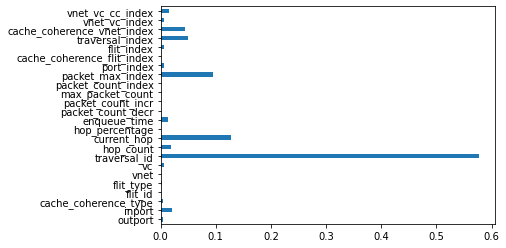

In [143]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

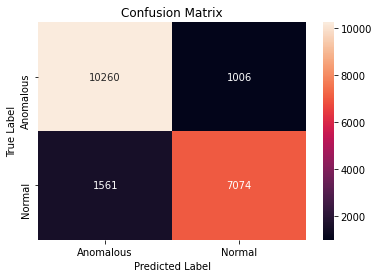

In [144]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [145]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11266
           1       0.88      0.82      0.85      8635

    accuracy                           0.87     19901
   macro avg       0.87      0.86      0.87     19901
weighted avg       0.87      0.87      0.87     19901



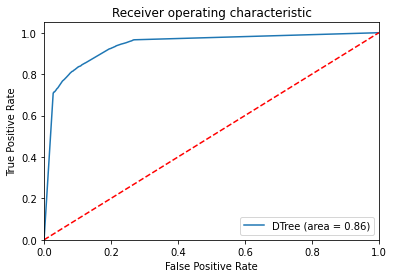

In [146]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [148]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [150]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 95.87950051506243
Test Prediction Score 89.36736847394603


In [151]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 79.22986247544205
Test Prediction Score 80.81684144129937
Test Prediction Score 81.3529921942758
Test Prediction Score 76.30666666666667
Test Prediction Score 82.66525824206371
Test Prediction Score 66.79293632666705
Test Prediction Score 23.741007194244602


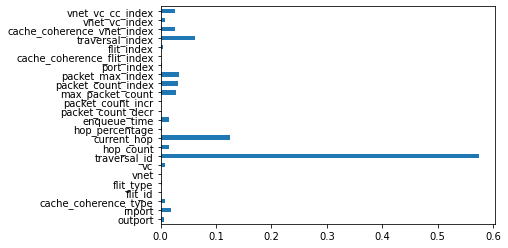

In [152]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

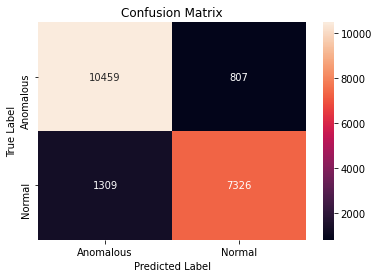

In [153]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [154]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11266
           1       0.90      0.85      0.87      8635

    accuracy                           0.89     19901
   macro avg       0.89      0.89      0.89     19901
weighted avg       0.89      0.89      0.89     19901



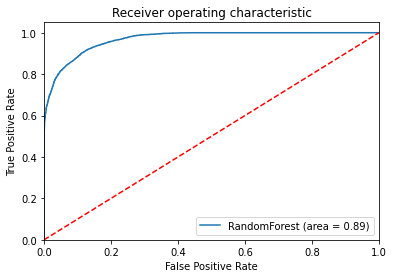

In [155]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [157]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [159]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.27011884123515
Test Prediction Score 94.41736596150947


In [160]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 94.33398821218074
Test Prediction Score 93.16407789955058
Test Prediction Score 93.67657494283687
Test Prediction Score 73.26
Test Prediction Score 87.32973814421527
Test Prediction Score 74.35240376580691
Test Prediction Score 5.241521068859199


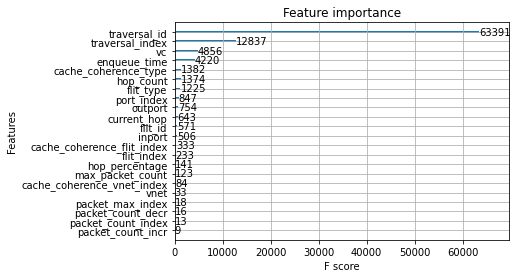

In [161]:
plot_importance(xgbc)
plt.show()

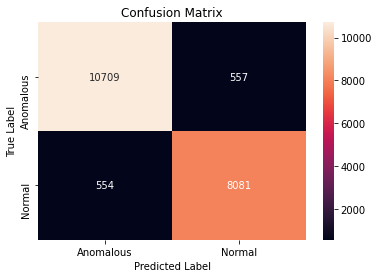

In [162]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [163]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11266
           1       0.94      0.94      0.94      8635

    accuracy                           0.94     19901
   macro avg       0.94      0.94      0.94     19901
weighted avg       0.94      0.94      0.94     19901



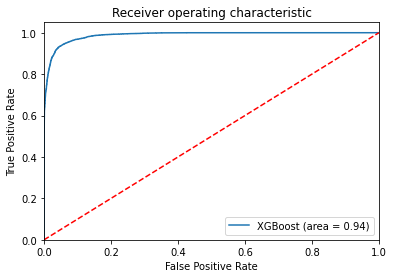

In [164]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [166]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [168]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.31695183538102
Test Prediction Score 81.78483493291795


In [169]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 95.60707269155206
Test Prediction Score 94.43349365292123
Test Prediction Score 95.1194512339352
Test Prediction Score 59.343333333333334
Test Prediction Score 93.86779340634904
Test Prediction Score 82.58592836053703
Test Prediction Score 5.915267785771383


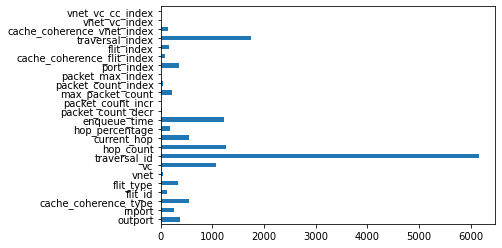

In [170]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

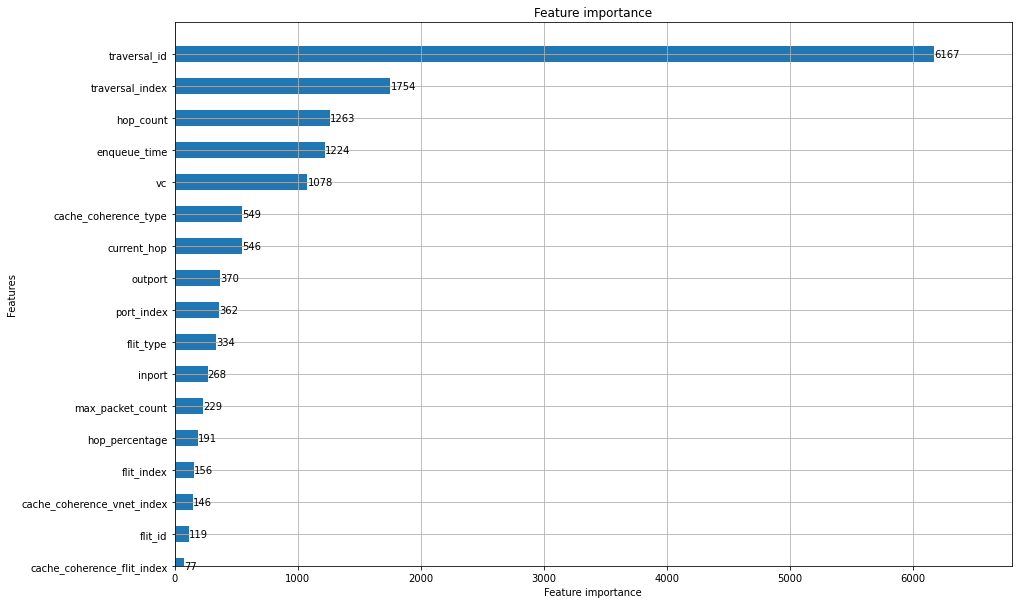

In [171]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [172]:
sorted(gbm.feature_importances_,reverse=True)

[6167,
 1754,
 1263,
 1224,
 1078,
 549,
 546,
 370,
 362,
 334,
 268,
 229,
 191,
 156,
 146,
 119,
 77,
 50,
 39,
 34,
 17,
 17,
 10,
 0]

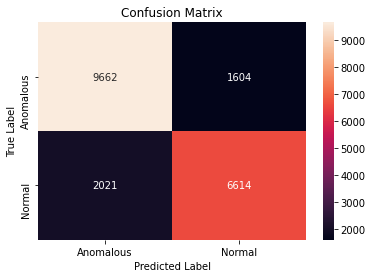

In [173]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [174]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11266
           1       0.80      0.77      0.78      8635

    accuracy                           0.82     19901
   macro avg       0.82      0.81      0.81     19901
weighted avg       0.82      0.82      0.82     19901



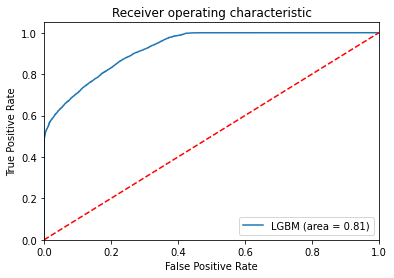

In [175]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()